<center>Заметка 4. Связанные компоненты</center>
<center>курса <q>Введение в цифровую обработку изображений</q>.</center>
<center>Шокуров Антон В.</center>
<center>shokurov.anton.v@yandex.ru</center>
<center>http://машинноезрение.рф</center>
<center>Версия 0.095</center>

<center>Аннотация</center>
<p>
...
</p>

<p>Это предварительная версия! Любые замечания приветствуются.</p>

In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

<b>Бинарное изображение</b>

Операторы применяются к бинарным изображениям, т.е. к изображениям из лжи (0) или истины (1).
В них 0 является фоном, а 1 обозначают объект, который мы пытаемся выделить.

Два соседних (по вертикали или по горизонтали) пикселя, в которых значения равны 1, лежат в одной компоненте связности. Рекурсивно можем вывести определение связанной компоненты:

Если любые 2 точки объекта можно соединить путём из горизонтальных или вертикальных отрезков, то эта компонента связна.

Бинарные изображения можно задавать как целочисленным типом, так и с плавающей запятой.

In [2]:
# Создаем изображение из плавающих чисел.
img_bin = np.zeros((100,100))
img_bin.dtype

dtype('float64')

Часть материала будет работать с изображениями, в которых применяется правило
"истина - это любое ненулевое значение", а часть - нет.
Поэтому,
лучше придерживатся правила,
что истина - это 1.0.

In [3]:
# Нарисуем два круга.
cv.circle( img_bin, (30, 60), 13, 1.0, -1);
cv.circle( img_bin, (80, 20), 10, 1.0, -1);

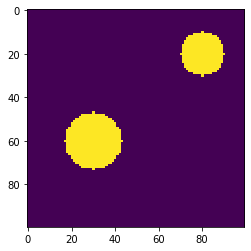

In [4]:
plt.imshow( img_bin, interpolation = 'none' );

In [5]:
# Можно вывести и через OpenCV
#cv.imshow( "bin", img_bin )
#cv.waitKey(0) # Для завершения нажимаем q.
#cv.destroyWindow('bin')

По аналогии можно сделать и целочисленный массив.
Обычно целочисленная арифметика на компьютере быстрее выполняется.
Поэтому, лучше использовать 8 битные целые числа.
Более того, числа должны быть неотрицательными.

In [6]:
# Создаем изображение из 8-битных неотрицательных целых чисел.
img_bin = np.zeros((100,100), 'uint8')
img_bin.dtype

dtype('uint8')

Одна из схем заключается в выставлении максимально возможного значения, т.е. 255 для 8-битных чисел.

In [7]:
cv.circle( img_bin, (30, 60), 13, 255, -1);
cv.circle( img_bin, (80, 20), 10, 255, -1);

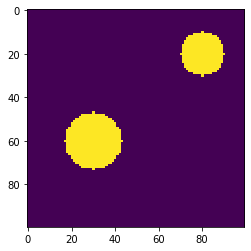

In [8]:
plt.imshow( img_bin, interpolation = 'none' );

По другой, что лучше по аналогии использовать значение 1.

In [9]:
img_bin = np.zeros((100,100), 'uint8')
cv.circle( img_bin, (30, 60), 13, 1, -1);
cv.circle( img_bin, (80, 20), 10, 1, -1);

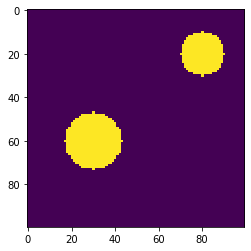

In [10]:
plt.imshow( img_bin, interpolation = 'none' );

<b>Формируем тестовое изображение</b>

Морфологические операторы используются для топологической модификации бинарных изображений.
Для того, чтобы показать суть, создадим пример тестового изображения.

In [11]:
# Создаем изображение из целых чисел.
img_bin = np.zeros((200,200), 'uint8')
img_bin.dtype

dtype('uint8')

In [12]:
# Рисуем круги.
# Указывается изображение,
# Центр изображения, радиус,
# цвет (в случае бинарного изображения, соответственно, 1 или 0)
# толщину линии, -1 означает заполнить.
cv.circle( img_bin, (50, 60), 15, 1, -1);
cv.circle( img_bin, (150, 160), 13, 1, -1);
cv.circle( img_bin, (50, 180), 11, 1, -1);

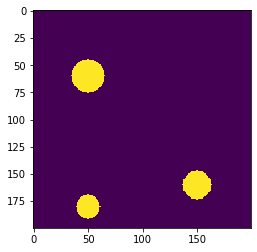

In [13]:
plt.imshow( img_bin, interpolation = 'none' );

In [14]:
# Отрисовываем прямоугольник.
# Указывается изображение,
# Координаты противоположных уголов,
# цвет и толщику линии.
cv.rectangle( img_bin, (100, 50), (140, 30), 1, -1);

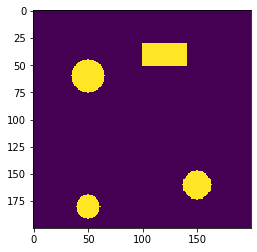

In [15]:
plt.imshow( img_bin, interpolation = 'none' );

Получаем 4 связанные компоненты на изображении.

Это изображение "идеально". В реальных практических задачах изображения выглядят иначе. Далее, испортим это изображение, добавив шум

In [16]:
img_bin.shape, img_bin.dtype

((200, 200), dtype('uint8'))

In [17]:
np.min(img_bin), np.max(img_bin)

(0, 1)

In [18]:
np.save("./img_bin.npy", img_bin)

In [19]:
#_img_bin_ = np.load("./img_bin.npy")
#_img_bin_.shape, _img_bin_.dtype

In [20]:
#np.alltrue ( _img_bin_ == img_bin )

<b>Добавим шум соль</b>

In [21]:
# Для точной повторяемости некоторых из результатов.
# для совместимости: np.random.seed(2021)
rng = np.random.default_rng(2021)

In [22]:
#rng?
rng.standard_normal()
# Должно быть -0.06886119500819549

-0.06886119500819549

Шум соль - это случайный набор белых пикселов, а шум перец - черных.
Такой шум, например, присущ датчикам изображения.

In [23]:
# Функция генерации равномерных случайных целых чисел
# от 0 до 5 не включительно в количестве 10 штук.
rng.integers(0, 5, 10) # randint

array([2, 4, 3, 2, 2, 1, 3, 3, 2, 0])

In [24]:
# Цикл по двум размерностям изображения.
[i for i in img_bin.shape]

[200, 200]

Сгенерируем 500 случайных точек (500 случайных чисел для х координаты и 500 - для у координаты).

In [25]:
# Для каждой из этих размерностей
# сгенерируем случайные целые числа.
coords = [rng.integers(0, i, int(500)) for i in img_bin.shape]

In [26]:
# Два элемента в списке.
len( coords )

2

In [27]:
# 500 элементов в каждом из двух списков.
coords[0].shape

(500,)

In [28]:
# Пример случайной координаты.
coords[1][300]

115

In [29]:
# Слуйчайная точка изображения.
coords[0][300], coords[1][300]

(151, 115)

In [30]:
img_bin[5,7], img_bin[50,60]

(0, 1)

In [31]:
# Доступ к точкам из списка.
img_bin[ ([5,50], [7,60])  ]

array([0, 1], dtype=uint8)

In [32]:
# Делаем копию изображения.
img_salt = img_bin.copy()

In [33]:
# Присвоение значения 1 сгенерированным случайным точкам.
img_salt[tuple(coords)] = 1

Т.к. 1 обозначают белый цвет, то получается изображение с шумом соль. Здесь шум рапределен равномерно вдоль каждой оси, мы не отслеживаем, попала ли точка внутрь какой либо фигуры. Таким образом, реально шумовых точек не 500, а меньше.

Такое изображение более близко к реальному. В дальнейшем будет лекция, которая посвящена устранению такого шума.

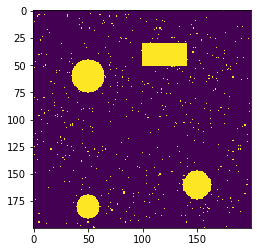

In [34]:
plt.imshow( img_salt, interpolation = 'none' );

In [35]:
img_salt.shape, img_salt.dtype

((200, 200), dtype('uint8'))

In [36]:
np.min(img_salt), np.max(img_salt)

(0, 1)

In [37]:
np.save("./img_salt.npy", img_salt)

In [38]:
#_img_salt_ = np.load("./img_salt.npy")
#_img_salt_.shape, _img_salt_.dtype

In [39]:
#np.alltrue ( _img_salt_ == img_salt )

Аналогично можно сгенерировать шум из черных точек - шум перец.

Возьмем точки, сгенерированные ранее, и присваиваем им значение 0.

In [40]:
img_pepper = img_salt.copy()

In [41]:
# Шум перец.
img_pepper[tuple(coords)] = 0

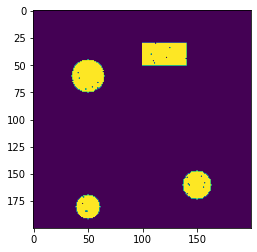

In [44]:
plt.imshow( img_pepper)#, interpolation = 'none' )

In [45]:
np.save("./img_pepper.npy", img_pepper)

В нашем изображении значения могут быть только 0 или 1. Промежуточных значений быть не может.

In [46]:
np.unique( img_salt )

array([0, 1], dtype=uint8)

In [47]:
# Вероятность соли:
500/(img_bin.shape[0] * img_bin.shape[1])

0.0125

Рассмотрим другой способ генерации шума

Зададим некое пороговое значение. Далее будем пробегать по всем пикселям изображения. Каждый шаг "подбрасываем кость" и проверяем, получилось ли значение выше или ниже порогового. Если выше, то в этом пикселе поставим точку шума.

In [48]:
# Равномерная случайная величина от 0 до 1.
rng.random()

0.32589590490085774

In [49]:
img_salt2 = img_bin.copy()

In [50]:
for i in range( img_salt2.shape[0] ):
    for j in range( img_salt2.shape[1] ):
        v = img_salt2[i,j]
        r = rng.random() < 0.0125
        if r:
            v = 1
        img_salt2[i,j] = v

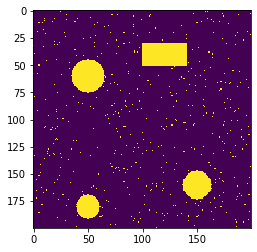

In [51]:
plt.imshow( img_salt2, interpolation = 'none' );

В случае, если нужно поставить мало точек шума (например, 10), лучше использовать первый способ. Но если шумовых точек много, то лучше использовать второй способ.

Сокращенно, используем "массивную" математику, без циклов.

Генерируем изображение случайных чисел и проверяем места, где значение меньше 0.0125

In [52]:
# Делаем копию тзображения.... мы же будет портить/изменять его.
img_salt3 = img_bin.copy()

In [53]:
img_salt3 = img_salt3 + ( rng.random( (img_salt2.shape[0], img_salt2.shape[1]) ) < 0.0125 )

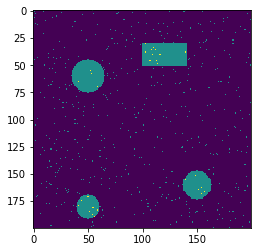

In [54]:
# Видим, что у нас теперь три цвета на тзображении.
plt.imshow( img_salt3, interpolation = 'none' );
# Это потому что при добавлении шума (1) к исходному объекту из 1 будет 2.

In [55]:
# Для того чтобы убрать лишние/зашкаливающие значения
# нужно сделать обрезку.
img_salt3 = np.clip( img_salt3, 0, 1) # два последних значения задают нижнюю и верхнюю границу обрезки.
# Срезать все лишнее.

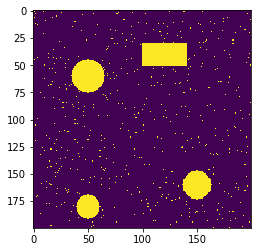

In [56]:
plt.imshow( img_salt3, interpolation = 'none' );

<h3>Соприкосание связанных компонент</h3>

Сгенерируем еще одно тестовое изображение. Теперь у каждого объекта есть свой однородный цвет.

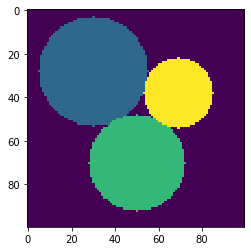

In [57]:
# Нарисуем круги так, чтобы они соприкосались.
img_touch_rgb = np.zeros((100,100), 'uint8')
cv.circle( img_touch_rgb, (30, 28), 25, 1, -1);
cv.circle( img_touch_rgb, (50, 70), 22, 2, -1);
cv.circle( img_touch_rgb, (69, 38), 16, 3, -1);
plt.imshow( img_touch_rgb, interpolation = 'none' );

Формально это одна компонента (цвет мы игнорируем). Допустим, исходя из предыдущих вычислений пороговой функции, данные так разбились.
Нужно их отделить друг от друга.

In [58]:
np.save("./img_touch_rgb.npy", img_touch_rgb)

<b>Связанные компоненты</b>

При обработке изображений с точки зрения морфологии важно в нем выделить связанные компоненты.
Они бывают 4 и 8 связанные.

In [59]:
np.array([
    [0, 1, 2],
    [3, 4, 5],
    [6, 7, 8]
])

array([[0, 1, 2],
       [3, 4, 5],
       [6, 7, 8]])

4 связанные -- имеют общую сторону с центральным (4) пикселем, т.е. 1, 3, 5 и 7.
8 связанные -- это 4 связанные, а также имеющие общий угол: 0, 2, 6 и 8.

In [60]:
img_components = np.zeros((200,200), 'uint8')
img_components.dtype

dtype('uint8')

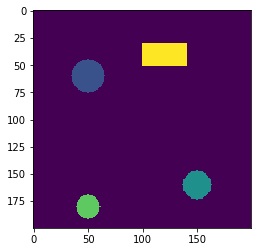

In [62]:
cv.circle( img_components, (50, 60), 15, 1, -1);
cv.circle( img_components, (150, 160), 13, 2, -1);
cv.circle( img_components, (50, 180), 11, 3, -1);
cv.rectangle( img_components, (100, 50), (140, 30), 4, -1);
plt.imshow( img_components, interpolation = 'none' );

Мысль идеологии работы со связными компонентами основана на том, что в идеальном варианте мы отделяем компоненты друг от друга, а далее работаем с каждой из компонент по отдельности. Например, после извлечения связной компоненты мы проверяем, круг это или прямоугольник. 
Считать сколько их, площадь, периметр... 
в конце концов и определять компоненту состоящую из определенного количества дырок.

Но прежде, чем это сделать, нам нужно отделить компоненты друг от друга.

На практике можно столкнуться с проблемами:
а) наличие шума типа соль/перец.
б) компоненты могут касаться.

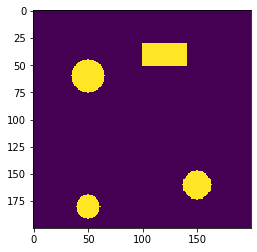

In [63]:
plt.imshow( img_bin, interpolation = 'none' );

Используем функцию connectedComponents из openCV. Подаём ей идеальное бинарное изображение (без шума), результат записываем в cmpts

cmpts[0] содержит количество компонент - в нашем случае, 5 (4 объекта + фон)

cmpts[1] представляет собой само изображение, где каждая компонента обозначается своим цветом. С точки зрения математики это означает, что в этой матрице у каждой компоненты своё значение (0, 1, 2, 3, 4).

In [64]:
cmpts = cv.connectedComponents( img_bin )
len(cmpts), cmpts[0] # 0 индекс содержит количество компонент.

(2, 5)

In [65]:
cv.connectedComponents?

Docstring:
connectedComponents(image[, labels[, connectivity[, ltype]]]) -> retval, labels
.   @overload
.   
.   @param image the 8-bit single-channel image to be labeled
.   @param labels destination labeled image
.   @param connectivity 8 or 4 for 8-way or 4-way connectivity respectively
.   @param ltype output image label type. Currently CV_32S and CV_16U are supported.
Type:      builtin_function_or_method


In [66]:
cmpts[0]

5

In [67]:
cmpts[1].shape

(200, 200)

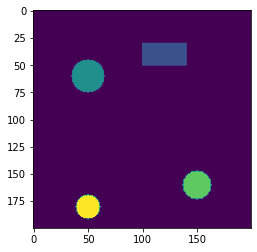

In [68]:
plt.imshow(cmpts[1]);

In [69]:
np.unique( cmpts[1] )

array([0, 1, 2, 3, 4], dtype=int32)

Для выделения конкретной компоненты в изображении достаточно сравнить аргумент, полученный с помощью cmpts[1], с номером искомой компоненты. Тогда мы получим изображение, которое содержит только этот объект.

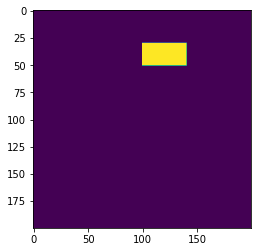

In [70]:
plt.imshow(cmpts[1]==1);

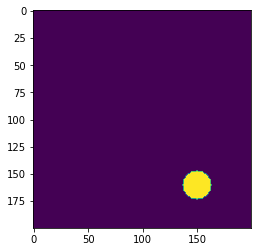

In [71]:
plt.imshow(cmpts[1]==3);

In [72]:
cmptsStats = cv.connectedComponentsWithStats( img_bin )
len(cmptsStats), cmptsStats[0] # 0 индекс содержит количество компонент.

(4, 5)

In [73]:
cmptsStats[0], cmptsStats[1].shape

(5, (200, 200))

In [74]:
cmptsStats[2]
# левый, верхний, ширина и высота... площадь

array([[    0,     0,   200,   200, 37524],
       [  100,    30,    41,    21,   861],
       [   35,    45,    31,    31,   709],
       [  137,   147,    27,    27,   529],
       [   39,   169,    23,    23,   377]], dtype=int32)

In [75]:
cmptsStats[3] # центройд

array([[ 99.75029315,  99.94989873],
       [120.        ,  40.        ],
       [ 50.        ,  60.        ],
       [150.        , 160.        ],
       [ 50.        , 180.        ]])

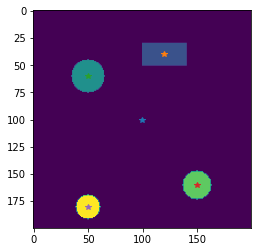

In [76]:
plt.imshow(cmpts[1]);
for pa in cmptsStats[3]:
    plt.plot( *pa, '*' )

In [77]:
#cv.connectedComponentsWithAlgorithm?

Вернемся к зашумленному изображению. Для него функция connectedComponentsWithStats найдет 444 компоненты, так как каждая точка шума будет определяться как отдельная связанная компонента. Очевидно, что чем больше компонент на изображении, тем медленнее работает алгоритм. Необходимо ускорить процесс его работы.

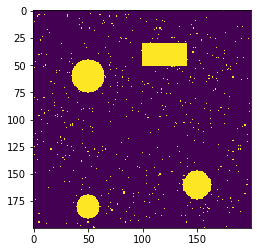

In [78]:
plt.imshow( img_salt, interpolation='none' );

In [79]:
cmptsStats = cv.connectedComponentsWithStats( img_salt )
len(cmptsStats), cmptsStats[0] # 0 индекс содержит количество компонент.

(4, 444)

In [80]:
ll = []
for pa in cmptsStats[2]:
    ll.append( pa[-1] )

In [81]:
ll = np.array( ll )

Построим распределение площадей компонент. Хотим отбросить те компоненты, у которых маленькая площадь.

(array([443.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([1.00000e+00, 3.70630e+03, 7.41160e+03, 1.11169e+04, 1.48222e+04,
        1.85275e+04, 2.22328e+04, 2.59381e+04, 2.96434e+04, 3.33487e+04,
        3.70540e+04]),
 <BarContainer object of 10 artists>)

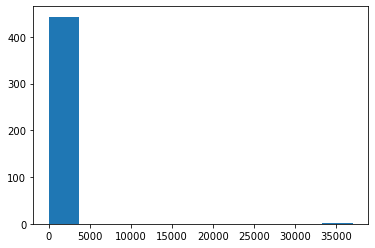

In [82]:
plt.hist( ll )

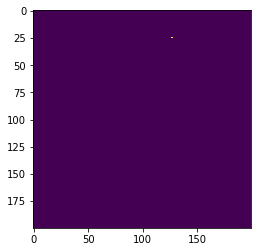

In [83]:
plt.imshow(cmptsStats[1]==50, interpolation='none');

In [84]:
ll[20:30]

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

Устанавливаем пороговое значение, равное 70. Считаем, что нас интересуют лишь те объекты, площадь которых больше 70. Таких компонент 5 - наши первоначальные объекты.

In [85]:
sum( ll > 70 )

5

In [86]:
np.where(ll > 70)

(array([  0,  63,  93, 341, 376]),)

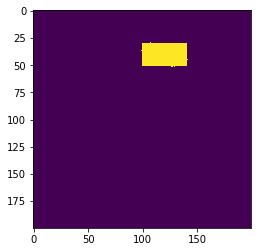

In [87]:
plt.imshow(cmptsStats[1]==63, interpolation='none');

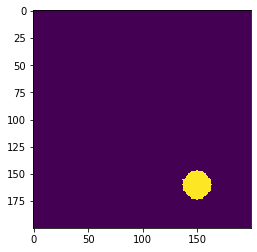

In [88]:
plt.imshow(cmptsStats[1]==341, interpolation='none');

Таким образом, обработка изображений с шумом соль/перец с помощью функции поиска компонент работает. Однако это возможно лишь благодаря мощности наших компьютеров, а для микроконтроллеров, спутников итд ресурсов не хватит. В следующей лекции будет рассказан более эффективный способ это сделать.

<h2>Подсчет фигур с дырками</h>

Перейдем к следующей задаче. Хотим подсчитать количество фигур с дырками. Будем для этого использовать понятие связной компоненты.

Идея состоит в следующем: если внутри связанной компоненты есть связанные дырки, то это связанная компонента с дырками. Иными словами, дырка в связанной компоненте должна быть связанным объектом, но она состоит не из единиц, а из нулей.

In [89]:
img_bincp = img_bin.copy()

In [90]:
img_bin = img_bincp.copy()

In [91]:
cv.rectangle( img_bin, (100, 125), (102,127), 1, -1);

In [92]:
cmpts = cv.connectedComponents( img_bin )
len(cmpts), cmpts[0] # 0 индекс содержит количество компонент.

(2, 6)

In [93]:
cmpts[1] # сами маски.

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

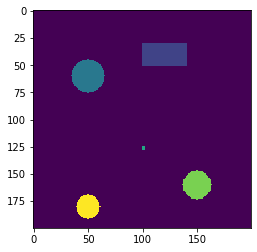

In [94]:
plt.imshow( cmpts[1], interpolation = 'none'  );

Сделаем две дырки в одном из кругов.

In [95]:
cv.circle( img_bin, (48, 176), 3, 0, -1);
cv.circle( img_bin, (48, 184), 3, 0, -1);

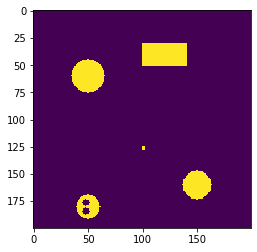

In [96]:
plt.imshow( img_bin, interpolation = 'none'  );

In [ ]:
# WithStats -- возвращает и "статистику", например, положение окружающего  прямоугольника.
cmpts = cv.connectedComponentsWithStats( img_bin )

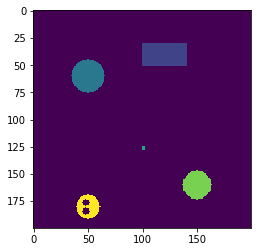

In [98]:
plt.imshow( cmpts[1], interpolation = 'none'  );

In [99]:
cmpts[2]# Наш круг последний

array([[    0,     0,   200,   200, 37573],
       [  100,    30,    41,    21,   861],
       [   35,    45,    31,    31,   709],
       [  100,   125,     3,     3,     9],
       [  137,   147,    27,    27,   529],
       [   39,   169,    23,    23,   319]], dtype=int32)

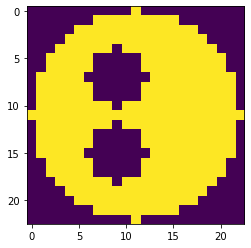

In [100]:
obj = cmpts[1][169:169+23,39:39+23]
plt.imshow( obj, interpolation = 'none'  );

Превратим это изображение в бинарное, а затем инвертируем его. 

In [136]:
np.unique(obj)

array([0, 5], dtype=int32)

In [101]:
obj = obj == 5
np.unique(obj)

array([False,  True])

In [102]:
obj = 1-obj # Инвентируем изображение.
np.unique(obj)

array([0, 1])

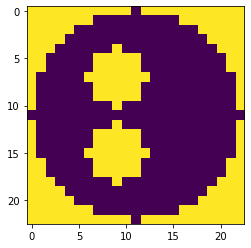

In [103]:
obj = np.uint8(obj)
plt.imshow( obj, interpolation = 'none'  );

Закрасим углы черным, чтобы они нам не мешали.
Функция floodFill выполняет заливку изображения каким-то цветом по указанной точке старта. 

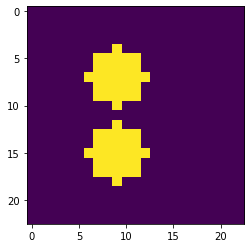

In [104]:
mask1 = np.zeros((obj.shape[0]+2, obj.shape[0]+2), np.uint8)
cv.floodFill( obj, mask1, (0,0), 0)
cv.floodFill( obj, mask1, (obj.shape[0]-1, obj.shape[0]-1), 0)
cv.floodFill( obj, mask1, (obj.shape[0]-1, 0), 0)
cv.floodFill( obj, mask1, (0, obj.shape[0]-1), 0)

plt.imshow( obj, interpolation = 'none'  );

Таким образом, мы убрали мешающие углы изображения, и у нас остались только дырки. Функция connectedComponets возвращает 3 компоненты (2 дырки + фон)

In [105]:
cmpts_obj = cv.connectedComponentsWithStats( obj )
cmpts_obj[0]

3

Для объекта без дырок код также работает корректно.

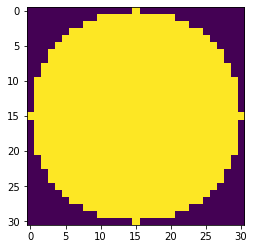

In [106]:
obj = cmpts[1][45:45+31,35:35+31]
plt.imshow( obj, interpolation = 'none'  );

In [107]:
obj = obj != 0 # Другой способ инвертирования. Работает и когда истина задается не 1.

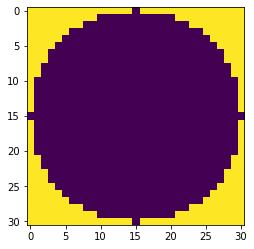

In [108]:
obj = np.uint8(1-obj)
plt.imshow( obj, interpolation = 'none'  );

По аналогии закрасим углы черным.

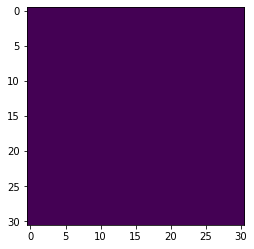

In [109]:
mask1 = np.zeros((obj.shape[0]+2, obj.shape[0]+2), np.uint8)
cv.floodFill( obj, mask1, (0,0), 0)
cv.floodFill( obj, mask1, (obj.shape[0]-1, obj.shape[0]-1), 0)
cv.floodFill( obj, mask1, (obj.shape[0]-1, 0), 0)
cv.floodFill( obj, mask1, (0, obj.shape[0]-1), 0)

plt.imshow( obj, interpolation = 'none'  );

Видно, что объектов нет.

In [110]:
cmpts_obj = cv.connectedComponentsWithStats( obj )
cmpts_obj[0]

1